In [40]:
import numpy as np
import mne
from matplotlib import pyplot as plt 
import os
import load
from paths import paths
import setup
from functions import (start_stop_samples_trigg , start_samples_trigg, add_trial_info_to_events,
    plot_fix_durs_mem_vs,plot_fix_durs_all_phases,closest_tuple,plot_trial, create_full_metadata)

import matplotlib.image as mpimg
import matplotlib.patches as patches
import pandas as pd
from  plot_general import rose_plot, plot_eye_movements
#%matplotlib qt

In [49]:
info = setup.exp_info()
su = 0
suj = load.subject(info,su)
eeg = suj.load_analysis_eeg()
evts = suj.load_metadata()


Ｌｏａｄｉｎｇ ＥＥＧ ｄａｔａ．．．．．
        ｓｕｂｊｅｃｔ   Ｓ１０１

Reading /Volumes/DAC500/Hybrid/Hybrid_preana_out/8.data_analysis/S101_analysis.fdt
Reading 0 ... 1769499  =      0.000 ...  3538.998 secs...


/Users/dac/Documents/repos/MNEdeconv/load.py:227: RuntimeWarning: Unknown types found, setting as type EEG:
eye: ['R-AREA', 'R-GAZE-X', 'R-GAZE-Y', 'TIME']
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)
/Users/dac/Documents/repos/MNEdeconv/load.py:227: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)



Ｌｏａｄｉｎｇ ｅｖｅｎｔｓ ｄａｔａ．．．．．
        ｆｒｏｍ

/Ｖｏｌｕｍｅｓ/ＤＡＣ５００/Ｈｙｂｒｉｄ/Ｈｙｂｒｉｄ_ａｎａ_ｏｕｔ/ｍｅｔａｄａｔａ/Ｓ１０１_ｆｕｌｌ_ｍｅｔａｄａｔａ．ｃｓｖ



/Users/dac/Documents/repos/MNEdeconv/load.py:227: RuntimeWarning: Not setting positions of 8 misc channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)


In [37]:
time=eeg[1,:][1].shape
500*10
array = np.array([1,2,3,4,5,6])
array[[0,3,5]]


AttributeError: 'tuple' object has no attribute 'shape'

IndexError: index 5000 is out of bounds for axis 0 with size 116

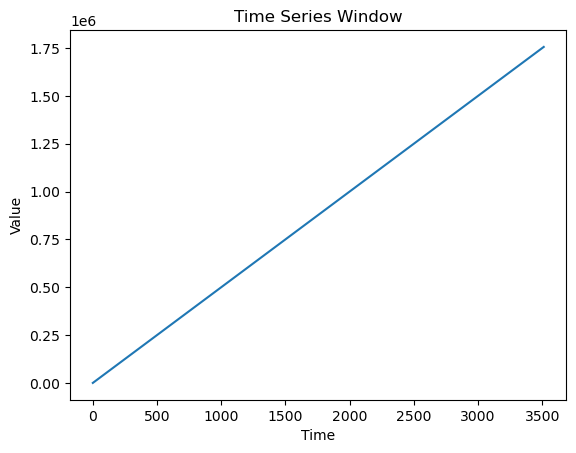

In [38]:
bad_start, bad_stop = start_stop_samples_trigg(evts,'bad_ET')
time=eeg[1,:][1]
#time = np.array(time)
window = 5000
jump = 2500
plot_time_series_with_navigation(time[bad_start],bad_start,window,jump)

In [54]:

interesting_event_type = {'fixation', 'saccade'}
bad_start, bad_stop = start_stop_samples_trigg(evts,'bad_ET')

# bad_start = bad_start.tolist()
# bad_stop = bad_stop.tolist()
evts['bad'] = 0

ind = 36
# Iterate through the rows
#evts_tmp = evts[evts['latency']==bad_start[ind]:bad_start[ind]+5,:]
    
#evts_tmp = evts[(evts['latency'] >= bad_start[ind]) & (evts['latency'] <= bad_stop[ind]+1000)]
evts_tmp = evts
    
# Check if latency_value falls between any pair of start and end values
for start, end in zip(bad_start, bad_stop):#[ind:ind+1]
    # print('pepe')
    # print('bad interval',start,end)
    for index, row in evts_tmp.iterrows():
        latency_value = row['latency']
        # print('event latency',latency_value)
        # print('event type',row['type'])
        # print((start <= latency_value) and (latency_value <= end))
        # print(row['type'] in interesting_event_type)
        if (start <= latency_value) and (latency_value <= end) and (row['type'] in interesting_event_type):             
            evts_tmp.loc[index, 'bad'] = 1
            

        
           


In [57]:
evts_tmp['bad'].sum


0        0
1        0
2        0
3        0
4        0
        ..
20769    0
20770    0
20771    0
20772    0
20773    0
Name: bad, Length: 20774, dtype: int64

In [51]:
evts

,type,latency,urevent,duration,endtime,sac_amplitude,sac_endpos_x,sac_endpos_y,sac_startpos_x,sac_startpos_y,...,sac_angle,trial,phase,mss,ontarget,ondistractor,present,correct,stm,bad
0,bad_ET,1.000000e+00,15925.0,53932,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,cross1,5.195000e+04,NaN,375,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,mem,5.232500e+04,NaN,1009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,cross2,5.333300e+04,NaN,558,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,vs,5.389065e+04,11.0,820,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20769,saccade,1.755452e+06,25995.0,63,0.0,3.130887,914.474609,462.30954,778.318787,358.051147,...,37.235302,210.0,cross2,1.0,NaN,NaN,True,True,NaN,0
20770,fixation,1.755515e+06,35858.0,201,0.0,3.130887,914.474609,462.30954,778.318787,358.051147,...,37.235302,210.0,cross2,1.0,NaN,NaN,True,True,NaN,0
20771,saccade,1.755716e+06,25996.0,6,0.0,0.179414,937.894836,459.48703,928.891846,451.397278,...,41.646737,210.0,cross2,1.0,NaN,NaN,True,True,NaN,0
20772,bad_ET,1.755816e+06,16040.0,13685,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


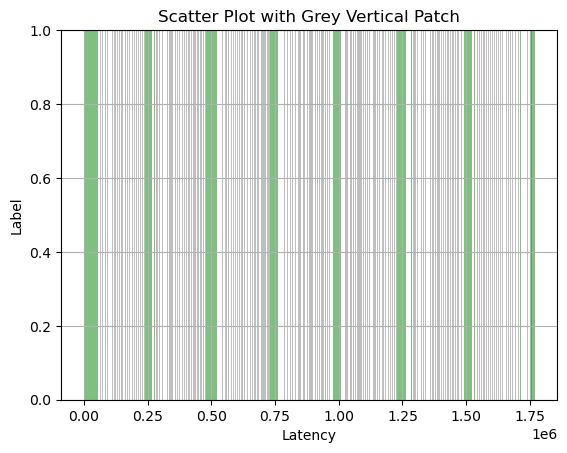

In [65]:
#make a plot of bad segments and fixations and saccades to assert if we are taking correctli bad data intervals
time = eeg[1,:][1].T
#bads = evts[evts['type']=='bad_ET']
#-------------plot just this range--------
inisam=500000
xlims  = [inisam,inisam+90000]
filter = False

bad_start, bad_stop = start_stop_samples_trigg(evts,'bad_ET')

vs_start, vs_stop = start_stop_samples_trigg(evts,'vs')
vs = vs_start + vs_stop
#-----------------------------------
if filter:
    #filtering
    bad_start = [i for i in bad_start if xlims[0] < i < xlims[1]]
    bad_stop = [i for i in bad_stop if xlims[0] < i < xlims[1]]
    vs_start = [i for i in vs_start if xlims[0] < i < xlims[1]]
    vs_stop = [i for i in vs_stop if xlims[0] < i < xlims[1]]

#--------------------------------



#plt.scatter(bad_start[1:20],bad_start[1:20],s=1)


# Labels for each latency
labels = ['A'] * len(vs) + ['B'] * len(bad_start)

# Scatter plot
#plt.scatter(bad_start, labels, color='red', marker='o')

# Add grey vertical patch for every other latency
for i in range(0,len(vs_start)):
    plt.axvspan(vs_start[i], vs_stop[i], facecolor='grey', alpha=0.5)
for i in range(0,len(bad_start)):
   plt.axvspan(bad_start[i], bad_stop[i], facecolor='green', alpha=0.5)
# Plot settings
plt.xlabel('Latency')
plt.ylabel('Label')
plt.title('Scatter Plot with Grey Vertical Patch')
plt.grid(True)

# Show the plot
plt.show()


#plt.scatter(bad_start,bad_start)



In [90]:
bad_start

[524185,
 525133,
 525261,
 525580,
 525825,
 530944,
 533050,
 533349,
 533699,
 534308,
 535032,
 535513,
 557580,
 559096,
 563170,
 569916]

In [49]:
evts[(evts['latency']>542346.0) & (evts['latency']<550001) ]

,type,latency,urevent,duration,endtime,sac_amplitude,sac_endpos_x,sac_endpos_y,sac_startpos_x,sac_startpos_y,...,sac_angle,trial,phase,mss,ontarget,ondistractor,present,correct,stm,bad
5907,saccade,542460.0,18869.0,8,0.0,0.307318,454.626038,966.273987,440.595856,978.414856,...,-42.182348,61.0,vs,4.0,NaN,NaN,False,True,NaN,0
5908,fixation,542468.0,28795.0,57,0.0,0.307318,454.626038,966.273987,440.595856,978.414856,...,-42.182348,61.0,vs,4.0,False,True,False,True,dog1970.png,0
5909,saccade,542525.0,18870.0,36,0.0,7.983073,869.002319,835.986023,453.899994,968.700012,...,-17.755842,61.0,vs,4.0,NaN,NaN,False,True,NaN,0
5910,fixation,542561.0,28796.0,50,0.0,7.983073,869.002319,835.986023,453.899994,968.700012,...,-17.755842,61.0,vs,4.0,False,True,False,True,dog1972.png,0
5911,saccade,542611.0,18871.0,12,0.0,1.286284,913.326782,775.874023,862.045959,826.299988,...,-43.965727,61.0,vs,4.0,NaN,NaN,False,True,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6015,saccade,549739.0,18921.0,35,0.0,5.976865,444.887787,925.048462,769.507202,966.353577,...,-172.664314,62.0,vs,1.0,NaN,NaN,True,True,NaN,0
6016,fixation,549774.0,28847.0,88,0.0,5.976865,444.887787,925.048462,769.507202,966.353577,...,-172.664314,62.0,vs,1.0,False,True,True,True,sheep751.png,0
6017,saccade,549862.0,18922.0,65,0.0,8.503088,756.358765,578.882080,441.124542,918.186096,...,-47.100428,62.0,vs,1.0,NaN,NaN,True,True,NaN,0
6018,fixation,549927.0,28848.0,69,0.0,8.503088,756.358765,578.882080,441.124542,918.186096,...,-47.100428,62.0,vs,1.0,False,True,True,True,sheep926.png,0


In [67]:
[i for i in bad_start if 532346.0 <i<560001 ]



# trial = 206
# plot_trial(eeg,suj,trial)

[533050, 533349, 533699, 534308, 535032, 535513, 557580, 559096]

In [66]:

np.diff([i for i in bad_start if 532346.0 <i<560001 ])


array([  299,   350,   609,   724,   481, 22067,  1516])

In [71]:
bad_start.tolist().index(535513)
bad_start[36]

535513

In [64]:
bad_start, bad_stop = start_stop_samples_trigg(evts,'bad_ET')


In [18]:
def plot_time_series_with_navigation(x,y,window,jump): 
    import numpy as np
    import matplotlib.pyplot as plt
    from ipywidgets import Button, VBox
    from IPython.display import display, clear_output

    # Generate example data
    # x = np.linspace(0, 1000, 1000)
    # y = np.sin(x)

    # Define the window size and jump size
    window_size = window
    jump_size = jump

    # Define the current start index
    start_index = 0

    # Define the plotting function
    def plot_window():
        end_index = start_index + window_size

        # Clear previous plot
        clear_output(wait=True)

        # Plot the windowed data
        plt.plot(x[start_index:end_index], y[start_index:end_index])
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Time Series Window')

        # Set the x-axis limits based on the current window
        plt.xlim(x[start_index], x[end_index])

        # Show the plot
        plt.show()

    # Define the button callback functions
    def next_window(_):
        global start_index
        if start_index + jump_size + window_size <= len(x):
            start_index += jump_size
            plot_window()
            display(buttons_box)

    def previous_window(_):
        global start_index
        if start_index - jump_size >= 0:
            start_index -= jump_size
            plot_window()
            display(buttons_box)

    # Create the Next and Back buttons
    next_button = Button(description='Next')
    back_button = Button(description='Back')

    # Register the button callback functions
    next_button.on_click(next_window)
    back_button.on_click(previous_window)

    # Create a vertical box layout for the buttons
    buttons_box = VBox([back_button, next_button])

    # Display the initial plot and button box
    plot_window()
    display(buttons_box)



Ｌｏａｄｉｎｇ ｂｅｈａｖｉｏｕｒａｌ ｄａｔａ．．．．．
            ｆｒｏｍ   [＇１０１_ｈｙｂｒｉｄ_ｓｅａｒｃｈ_ｂｕｉｌｄｅｒ_ｃｏｄｅ_２０２１_Ｎｏｖ_２３_１０２１．ｃｓｖ＇]


Ｌｏａｄｉｎｇ ｅｖｅｎｔｓ ｄａｔａ．．．．．
        ｆｒｏｍ

/Ｖｏｌｕｍｅｓ/ＤＡＣ５００/Ｈｙｂｒｉｄ/Ｈｙｂｒｉｄ_ｐｒｅａｎａ_ｏｕｔ/９．ｅｖｅｎｔ_ｓｔｒｕｃｔｓ/Ｓ１０１_ｅｖｅｎｔｓ．ｃｓｖ



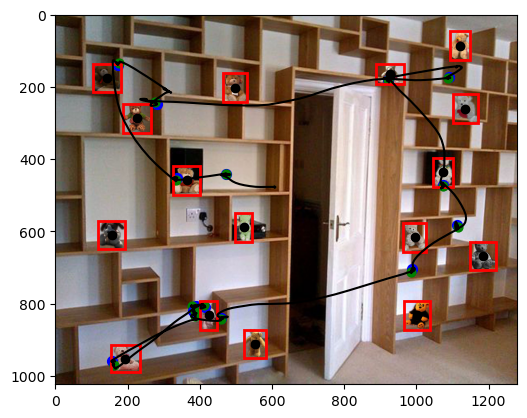

In [45]:
trial = 5
plot_trial(eeg,suj,trial)

In [60]:
for start, end in zip(bad_start, bad_stop):
    print(start,end)

524185 523879
525133 524324
525261 525259
525580 525451
525825 525807
530944 525931
533050 531055
533349 533231
533699 533556
534308 534198
535032 534632
535513 535219
557580 535680
559096 557701
563170 559234
569916 563294


In [64]:
bad_start, bad_stop = start_stop_samples_trigg(evts,'bad_ET')
pepe=zip(bad_start,bad_stop)
print(list(pepe))

[(1, 53933), (55354, 55502), (80494, 80649), (99260, 99405), (132235, 132369), (161707, 161817), (176561, 176662), (191142, 191264), (241393, 266843), (267441, 267601), (268163, 268335), (269196, 269373), (269378, 269629), (276698, 276882), (276981, 277370), (277559, 277763), (277943, 278311), (278457, 278755), (280379, 280520), (285406, 285541), (299972, 300127), (414458, 414701), (440928, 441139), (461018, 461203), (480088, 523879), (524185, 524324), (525133, 525259), (525261, 525451), (525580, 525807), (525825, 525931), (530944, 531055), (533050, 533231), (533349, 533556), (533699, 534198), (534308, 534632), (535032, 535219), (535513, 535680), (557580, 557701), (559096, 559234), (563170, 563294), (569916, 570093), (642240, 642345), (687305, 687406), (731858, 762783), (762940, 763045), (763066, 763201), (764146, 764250), (765193, 765294), (765319, 765432), (772210, 772447), (772636, 773607), (773729, 773921), (774519, 774705), (792524, 792628), (889369, 889492), (889936, 890093), (89